# Correlation

Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.

## Pearson's Correlation Coefficient

The goal of this test is to answer the question: do two samples have a linear relationship?

To answer this question, we will take the following steps:

1. Calculate the Pearson correlation coefficient, $r_{xy}$
2. Calculate the corresponding t-values
3. Test whether the t-values are significant or not

In this lesson, we will be looking at a dataset of student scores on an exam.

In [10]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from pydataset import data


In [13]:
# load data
df = pd.read_csv('exam_scores.csv')


In [15]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   exam_score       40 non-null     float64
 1   hours_studied    40 non-null     float64
 2   study_strategy   20 non-null     object 
 3   handedness       40 non-null     object 
 4   coffee_consumed  40 non-null     int64  
 5   hours_slept      40 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


### Pre-Set Values

Before we perform the test, we will choose some values for our confidence interval and, based on that value, our alpha.

In [20]:
# to get the number of samples
n = df.shape[0] # number of rows

# degrees of freedom 
deg_f = n - 2

# confidence interval
conf_int = 0/95
alpha = 1 - conf_int


n, deg_f, conf_int

(40, 38, 0.0)

When performing a correlation test, our null hypothesis is that there is no linear correlation between the two variables.

$H_0$: There is no linear correlation between the number of hours studied and the score on the exam.

### Calculate Pearson Correlation Coefficient

The correlation coefficient, $r_{xy}$ is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation. 

We will calculate the correlation between hours studied and exam score.

$$
r_{xy} = \frac{\frac{1}{n} \sum(x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}
$$

In [ ]:
# let's make a quick little function for standard deviation, and calculate the correlation coefficient:

In [21]:
# define our x and y -  2 different samples
x = df.hours_studied
y = df.exam_score

def stdev(x):
    '''
    returns the float value of standard deviation of input x, 
    an argument representing a pandas Series or 1-D numpy array
    '''
    variance = ((x - x.mean()) ** 2).sum()/n
    return variance ** 0.5

In [22]:
stdev(y)

28.687692543959553

In [25]:
r_xy = ((1 / n)*((x - x.mean()) * (y - y.mean())).sum()) / (stdev(x) * stdev(y))
r_xy

0.8351498542755269

r seems pretty high

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

### And just as we noted, we can think of these two Series as an x and y variable on a cartesian plot, and visually estimate correlation:

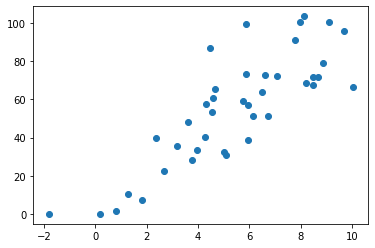

In [27]:
plt.scatter(x, y)
# shows a pretty strong correlation

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

### Calculate the corresponding p-value

We can calculate a t-statistic for our correlation coefficient in order to inform us how likely it is that we observed this result due to chance. We will then use this t-statistic to find our p-value.

The t-value can be positive for positive correlations and negative for negative correlations, and is given by:

$$ t = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^{2}_{xy}}} $$

Where $n - 2$ is our degrees of freedom.

In [29]:
# calculate our t-statistic:
t = (r_xy * sqrt(deg_f)) / sqrt(1-r_xy ** 2)
t

9.35999837853023

Once we have our t-statistic, we can find our p-value by looking up the t-statistic in a t-table, or by using scipy's `t` distribution:

In [31]:
# calculate our p-value: 
p = stats.t.sf(t, df = deg_f) * 2 # multiplying by 2 because we are looking at both ends of the dist
p

2.076295324018843e-11

Lastly, we compare our p value to our alpha that we selected earlier:

In [32]:
# compare our p-value to our alpha:
p < alpha

True

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
# Now, the easy way:

In [35]:
corr, p = stats.pearsonr(x, y)

In [36]:
# returns pearson's r and p-value
corr, p

(0.8351498542755271, 2.0762953240187937e-11)

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

#### Mini exercise:

1. Load up the Swiss dataset from pydataset.
2. Examine the proportion of Catholic individuals to Fertility.
3. What do your r and p statistics indicate? What do they tell you? WHat is your null hypothesis?

In [37]:
swiss = data('swiss')

In [51]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [38]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [39]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [43]:
# to get the number of samples
n = swiss.shape[0] # number of rows

# degrees of freedom 
deg_f = n - 2

# confidence interval
conf_int = 0.95
alpha = 1 - conf_int


n, deg_f, alpha

(47, 45, 0.050000000000000044)

$H_0$: There is no linear correlation between fertility and number of catholic individuals

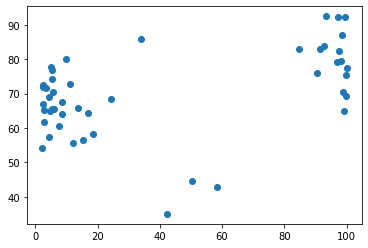

In [52]:
# assign our x an dy for comparison
# plot the dist
x = swiss.Catholic
y = swiss.Fertility

plt.scatter(x,y)

In [49]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.46368470065179385, 0.0010285231901181417)

In [50]:
p < alpha

True

pearson's r is not very high at 46% indicating some positive correlation. However, the p-value is less than alpha so we reject the null hypothesis that there is no linear correlation between fertility and catholic.

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

## Correlation Gotchas

When working with correlation, keep in mind:

1. Correlation is not causality.
1. Correlation measures *linear* relationship between the 2 variables. However, there may be other types of relationships, such as a quadratic or absolute value relationship.
1. Correlations can be misleading when confounding variables are ignored.
1. Correlation tells you nothing about how large the relationship is.

### Correlation is Not Causation

Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.

### Non-Linear Relationship

Here we'll look at an example of a non-linear relationship:

In [ ]:
# let's plot something that definitely does have a correlation, but is not linear

In [53]:
x = np.linspace(-3,3)
y = x ** 2


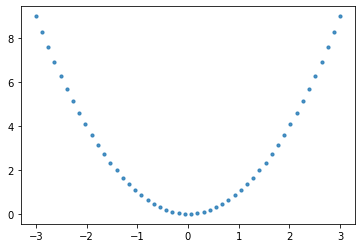

In [54]:
plt.scatter(x, y, s = 10, alpha =0.8)
# pretty strong correlation here

In [55]:
r, p = stats.pearsonr(x, y)

In [56]:
r, p

(-1.700029006457271e-16, 0.9999999999999966)

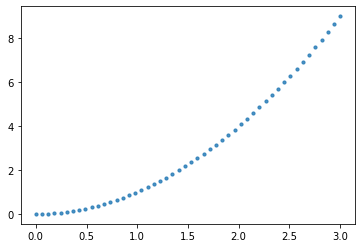

In [57]:
x = np.linspace(0,3)
y = x ** 2
plt.scatter(x, y, s = 10, alpha =0.8)

In [60]:
r, p = stats.pearsonr(x, y)
r, p

# shows strong linear corr but we know it's quadratic and not linear

(0.9670508513356975, 3.5714386385973106e-30)

### Confounding Variables

We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.

In our exam score data, if we look at coffee consumption and exam score, we see that they are strongly negatively correlated:

In [61]:
df.columns

Index(['exam_score', 'hours_studied', 'study_strategy', 'handedness',
       'coffee_consumed', 'hours_slept'],
      dtype='object')

In [62]:
x = df.coffee_consumed
y = df.exam_score

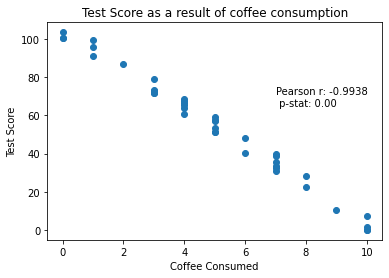

In [65]:
plt.scatter(x, y)
plt.xlabel('Coffee Consumed')
plt.ylabel('Test Score')
plt.title('Test Score as a result of coffee consumption')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (7, 65))
plt.show()

strong negative correlation 

In [73]:
# reassign x 

x = df.hours_slept

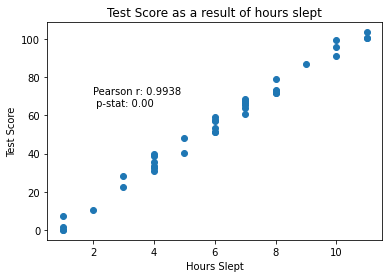

In [68]:
plt.scatter(x, y)
plt.xlabel('Hours Slept')
plt.ylabel('Test Score')
plt.title('Test Score as a result of hours slept')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (2, 65))
plt.show()

high correlation between hours slept and test score

However, it is probably the case that a third variable here has more influence, the number of hours that each student slept before the exam. We know that getting a good night's sleep improves exam scores, and if you don't get a good night's sleep, you are probably likely to drink more coffee.

In [69]:
# reassign x and y

x = df.hours_slept
y = df.coffee_consumed

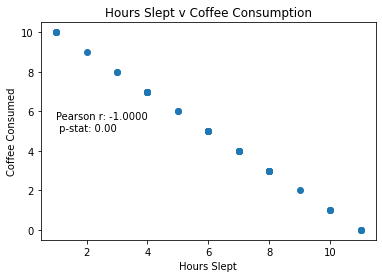

In [72]:
plt.scatter(x, y)
plt.xlabel('Hours Slept')
plt.ylabel('Coffee Consumed')
plt.title('Hours Slept v Coffee Consumption')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (1,5))
plt.show()

perfect negative correlation of -1

### Scale of the Relationship

The correlation coefficient shows us how linearly correlated two variables are, but doesn't tell us the scale. That is one variable could increase/decrease in lock step with another, but the size of the change could be tiny.

Imagine our data was a little different and we tracked several student's coffee intake before an exam. The coffee consumption could be perfectly correlated with exam score, but to such a small amount that it doesn't matter.

In [77]:
# make our own dataset

x = coffee_consumed = [0,1,2,3,4]
y = exam_score = [80,80.1,80.2,80.3,80.4]

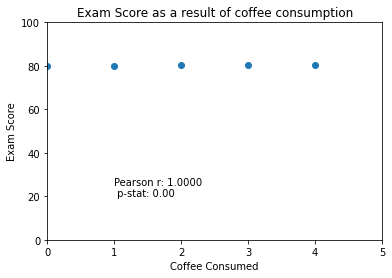

In [85]:
plt.scatter(x, y)
plt.xlabel('Coffee Consumed')
plt.ylabel('Exam Score')
plt.ylim(0,100)
plt.xlim(0,5)
plt.title('Exam Score as a result of coffee consumption')
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x,y)[1]:.2f}', xy = (1,20))
plt.show()

# perfect pearson's r but flat line does not show meaningful correlation

<hr style="border-top: 10px groove cyan; margin-top: 1px; margin-bottom: 1px"></hr>